In [1]:
# placeholder for statistical modeling in finance 
import math
import numpy as np
import numpy.random as npr
import scipy.stats as scs
from pylab import plt, mpl

plt.style.use('seaborn')
%matplotlib inline

## Risk Measures

### Value-at-Risk

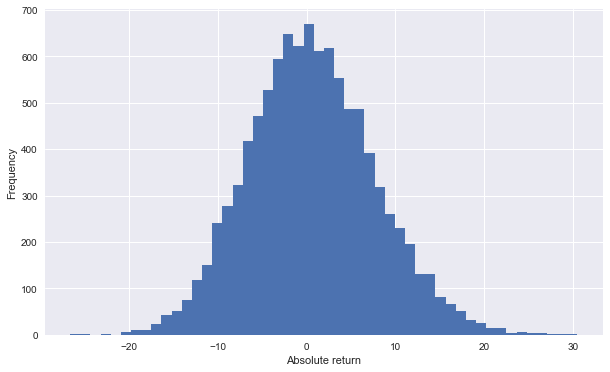

In [27]:
# Below is example of simulayed portfolio P&L histogram 
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365
I = 10000

# Simulates end-of-period values for geometric Brownian motion
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +  sigma * np.sqrt(T) * npr.standard_normal(I)) 

# Calculates the absolute profits and losses per simulation run and sorts the values
R_gbm = np.sort(ST - S0)

plt.figure(figsize=(10,6))
plt.hist(R_gbm, bins=50)
plt.xlabel('Absolute return')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Showing VaR using scs.scoreatpercentile() ndarray object
percs = [0.01, 0.1, 1.0, 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('16.2f %16.3f' % (100 - pair[0], - pair[1]))


Confidence Level    Value-at-Risk
---------------------------------


TypeError: not all arguments converted during string formatting

### Credit Valuation Adjustments

In [28]:
# Using the Poisson distribution, default scenarious are generated as follows, noting that default only happens once

S0 = 100
r = 0.05
sigma = 0.2
T = 1
I = 10000

# Simulates end-of-period values for geometric Brownian motion
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +  sigma * np.sqrt(T) * npr.standard_normal(I)) 

# Define the loss level
L = 0.5

# Define probability of default
p = 0.01

# Simulate default events
D = npr.poisson(p * T, I)

# Limit defaults to one such event
D = np.where(D > 1, 1, D)

In [29]:
# Whithout default, the risk-neutral value of teh future index level should be current value today
# The CVaR and the present value of teh asset, adjusted for credit risk, are given as follows:
math.exp(-r * T) * np.mean(ST)

100.01861233669004

In [31]:
CVaR = math.exp(-r * T) * np.mean( L * D * ST)
CVaR

0.44524963096490017

In [32]:
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)
S0_CVA

99.57336270572513

In [34]:
S0_adj = S0 - CVaR
S0_adj

99.5547503690351